In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#path import
path = r'C:\Users\guzic\Contacts\Instacart Grocery Basket Analysis'

In [3]:
# pickel file import

ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepped Data', 'ords_prods_cust_merged2.pkl'))

MemoryError: 

In [4]:
# import checks

ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,dependants,fam_status,income,region,activity_flag,generation,economic_class,parent_status,day_of_week,department_name
0,2539329,1,1,2,8,100000,196,1,0,both,...,3,married,40423,South,Active,"Millenial, 25-41","Lower, less than $52200",Parent,Monday,Beverages
1,2398795,1,2,3,7,15.0,196,1,1,both,...,3,married,40423,South,Active,"Millenial, 25-41","Lower, less than $52200",Parent,Tuesday,Beverages
2,473747,1,3,3,12,21.0,196,1,1,both,...,3,married,40423,South,Active,"Millenial, 25-41","Lower, less than $52200",Parent,Tuesday,Beverages
3,2254736,1,4,4,7,29.0,196,1,1,both,...,3,married,40423,South,Active,"Millenial, 25-41","Lower, less than $52200",Parent,Wednesday,Beverages
4,431534,1,5,4,15,28.0,196,1,1,both,...,3,married,40423,South,Active,"Millenial, 25-41","Lower, less than $52200",Parent,Wednesday,Beverages


In [5]:
# shape check

ords_prods_cust_merge.shape

(30964564, 38)

In [6]:
ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'time_of_order', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'frequency_customer', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'dependants', 'fam_status',
       'income', 'region', 'activity_flag', 'generation', 'economic_class',
       'parent_status', 'day_of_week', 'department_name'],
      dtype='object')

In [7]:
# 7 - Aggregate the max, mean, and min variables on a customer-profile level 
# for usage frequency and expenditure.

#ords_prods_cust_merge.groupby('generation').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

#generation_freq = ords_prods_cust_merge.groupby('generation').agg({'days_since_prior_order' : ['mean', 'min', 'max']})
#region_freq = ords_prods_cust_merge.groupby('region').agg({'days_since_prior_order' : ['mean', 'min', 'max']})
#economic_class_freq = ords_prods_cust_merge.groupby('economic_class').agg({'days_since_prior_order' : ['mean', 'min', 'max']})
#parent_status_freq = ords_prods_cust_merge.groupby('parent_status').agg({'days_since_prior_order' : ['mean', 'min', 'max']})


In [ ]:
# expenditure

In [13]:
ords_prods_cust_merge.groupby('generation').agg({'avg_price' : ['mean', 'min', 'max']})

avg_price                        
                        mean       min           max
generation                                          
Boomers I, 67-76   11.714221  1.262500   7414.485185
Boomers II, 58-67  11.759717  1.308333   3181.452910
Gen-X, 42-57       12.101568  1.000000  15006.940000
Gen-Z, 18-25       12.373002  2.000000  10209.987755
Millenial, 25-41   11.951905  1.000000   6388.812766
Post War, 76-95=4  11.648011  1.933333  14042.512281
WWII, 95+          11.355611  2.133333   6390.138298

In [14]:
ords_prods_cust_merge.groupby('region').agg({'avg_price' : ['mean', 'min', 'max']})

avg_price                      
                mean     min           max
region                                    
Midwest    12.598113  1.0000   8794.882427
Northeast  11.542582  1.1000   7414.485185
South      12.118845  1.2625  15006.940000
West       11.518117  1.0000  10209.987755

In [12]:
ords_prods_cust_merge.groupby('economic_class').agg({'avg_price' : ['mean', 'min', 'max']})

avg_price                   
                              mean  min           max
economic_class                                       
Lower, less than $52200   6.766403  1.0     13.878571
Middle                    9.601568  1.3  14042.512281
Upper, more than $156k   39.869828  7.0  15006.940000

In [15]:
ords_prods_cust_merge.groupby('parent_status').agg({'avg_price' : ['mean', 'min', 'max']})


avg_price                   
                    mean  min           max
parent_status                              
Non-parent     12.102657  1.0  15006.940000
Parent         11.877157  1.0  10209.987755

In [ ]:
# frequency

In [17]:
ords_prods_cust_merge.groupby('generation')['frequency_flag'].value_counts(dropna = False)

generation         frequency_flag       
Boomers I, 67-76   Frequent customer        2895721
                   Regular customer          966141
                   Non-frequent customer     505783
Boomers II, 58-67  Frequent customer        2770451
                   Regular customer          963436
                   Non-frequent customer     517635
Gen-X, 42-57       Frequent customer        5123881
                   Regular customer         1775609
                   Non-frequent customer     930311
Gen-Z, 18-25       Frequent customer        2234308
                   Regular customer          756047
                   Non-frequent customer     395706
Millenial, 25-41   Frequent customer        5066063
                   Regular customer         1763819
                   Non-frequent customer     905302
Post War, 76-95=4  Frequent customer        1594057
                   Regular customer          553452
                   Non-frequent customer     288543
WWII, 95+          Freq

In [45]:
ords_prods_cust_merge.groupby('region')['frequency_flag'].value_counts(dropna = False)

region     frequency_flag       
Midwest    Frequent customer        3942637
           Regular customer         1386726
           Non-frequent customer     721519
Northeast  Frequent customer        3588160
           Regular customer         1239861
           Non-frequent customer     636664
South      Frequent customer        6775055
           Regular customer         2318284
           Non-frequent customer    1217800
West       Frequent customer        6004781
           Regular customer         2050963
           Non-frequent customer    1082114
Name: frequency_flag, dtype: int64

In [19]:
ords_prods_cust_merge.groupby('economic_class')['frequency_flag'].value_counts(dropna = False)

economic_class           frequency_flag       
Lower, less than $52200  Frequent customer         2319492
                         Regular customer           867121
                         Non-frequent customer      505840
Middle                   Frequent customer        16166132
                         Regular customer          5524302
                         Non-frequent customer     2850214
Upper, more than $156k   Frequent customer         1825009
                         Regular customer           604411
                         Non-frequent customer      302043
Name: frequency_flag, dtype: int64

In [20]:
ords_prods_cust_merge.groupby('parent_status')['frequency_flag'].value_counts(dropna = False)

parent_status  frequency_flag       
Non-parent     Frequent customer         5066668
               Regular customer          1762011
               Non-frequent customer      911002
Parent         Frequent customer        15243965
               Regular customer          5233823
               Non-frequent customer     2747095
Name: frequency_flag, dtype: int64

In [22]:
# 8 - Compare your customer profiles with regions and departments. Can you 
# identify a link between them? Customers may demonstrate different behaviors
# across regions, which could make this information important

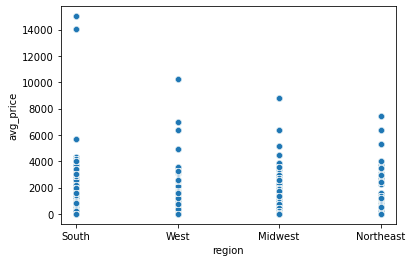

In [31]:
region_avg_price = sns.scatterplot(x = 'region', y = 'avg_price',data = ords_prods_cust_merge)

In [33]:
# Comparing regions & average prrice - the south has the highest average price

In [32]:
# export
region_avg_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_avg_price.png'))

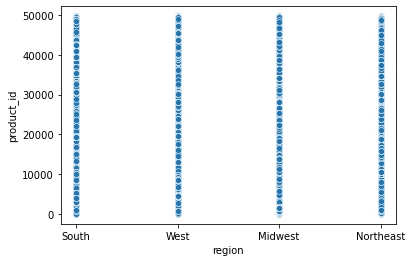

In [34]:
region_products = sns.scatterplot(x = 'region', y = 'product_id',data = ords_prods_cust_merge)

In [40]:
# comparing regions and product_id - nothing is standing out

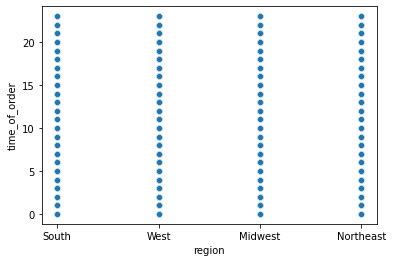

In [35]:
region_time_of_order = sns.scatterplot(x = 'region', y = 'time_of_order',data = ords_prods_cust_merge)

In [41]:
# comparing regions and time_of_order - nothing is standing out

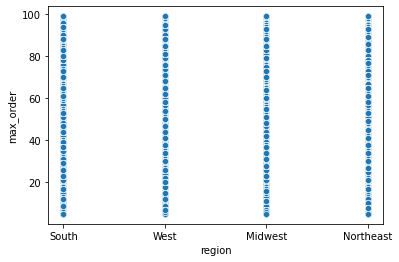

In [36]:
region_max_order = sns.scatterplot(x = 'region', y = 'max_order',data = ords_prods_cust_merge)

In [44]:
# comparing region and max order - nothing is standing out

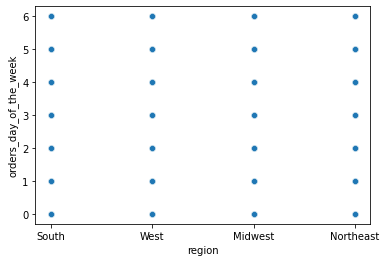

In [39]:
region_day_of_week = sns.scatterplot(x = 'region', y = 'orders_day_of_the_week',data = ords_prods_cust_merge)

In [43]:
# comparing region and orders_day_of_the_week - nothing is standing out

In [42]:
# data export

ords_prods_cust_merge.to_pickle(os.path.join(path, '02 Data','Prepped Data', 'ords_prods_cust_merged2.pkl'))